# Importing the libraries

In [1]:
import requests
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib

## Make the Web request and fetch data from the URL

In [49]:
url = "http://books.toscrape.com/"

# TODO: Use `requests` to do an HTTP request to fetch data located at that URL
request = requests.get(url)
data = request.content

# TODO: Create a `BeautifulSoup` instance with that data
soup = BeautifulSoup(data, "html.parser")
books = soup.find_all("article", class_="product_pod")
len(books)


20

## Parsing _one_ book

In [25]:
books_title = books[0].find("h3").string
book_price = float(books[0].find("p", class_="price_color").string.strip("£"))
book_price

51.77

In [28]:
book_stars = books[0].find("p", class_="star-rating")
book_stars.attrs['class']

['star-rating', 'Three']

In [29]:
def parse_rating(rating_classes):
    # TODO: Look at `rating_classes` and return the right rating
    # e.g. of an argument for `rating_classes`: [ 'star-rating', 'Three' ]
    # "One" => 1
    # "Two" => 2
    # "Three" => 3
    # "Four" => 4
    # "Five" => 5
    rating_dict = {
        "One":1,
        "Two":2,
        "Three":3,
        "Four":4,
        "Five":5
    }
    for rate in rating_dict:
        if rate in rating_classes:
            return rating_dict[rate]
parse_rating(book_stars.attrs['class'])

3

## Parsing _all_ books

In [35]:
books_dict = {
    'Title': [],
    'Price': [],
    'Rating': []
}
for book in books:
    books_dict['Title'].append(book.find("h3").string)
    books_dict['Price'].append(float(book.find("p", class_="price_color").string.strip("£")))
    books_dict['Rating'].append(parse_rating(book.find("p", class_="star-rating").attrs['class']))
    
books_dict

{'Title': ['A Light in the ...',
  'Tipping the Velvet',
  'Soumission',
  'Sharp Objects',
  'Sapiens: A Brief History ...',
  'The Requiem Red',
  'The Dirty Little Secrets ...',
  'The Coming Woman: A ...',
  'The Boys in the ...',
  'The Black Maria',
  'Starving Hearts (Triangular Trade ...',
  "Shakespeare's Sonnets",
  'Set Me Free',
  "Scott Pilgrim's Precious Little ...",
  'Rip it Up and ...',
  'Our Band Could Be ...',
  'Olio',
  'Mesaerion: The Best Science ...',
  'Libertarianism for Beginners',
  "It's Only the Himalayas"],
 'Price': [51.77,
  53.74,
  50.1,
  47.82,
  54.23,
  22.65,
  33.34,
  17.93,
  22.6,
  52.15,
  13.99,
  20.66,
  17.46,
  52.29,
  35.02,
  57.25,
  23.88,
  37.59,
  51.33,
  45.17],
 'Rating': [3, 1, 1, 4, 5, 1, 4, 3, 4, 1, 2, 4, 5, 5, 5, 3, 1, 1, 2, 2]}

In [39]:
len(books_dict)       # You should have 3 dictionaries
len(books_dict["Title"]) # Each containing 20 elements from the 20 books, as many as on the web page!

20

### Loading data in Pandas

In [40]:
books_df = pd.DataFrame.from_dict(books_dict)
books_df

,Title,Price,Rating
0,A Light in the ...,51.77,3
1,Tipping the Velvet,53.74,1
2,Soumission,50.10,1
3,Sharp Objects,47.82,4
4,Sapiens: A Brief History ...,54.23,5
5,The Requiem Red,22.65,1
6,The Dirty Little Secrets ...,33.34,4
7,The Coming Woman: A ...,17.93,3
8,The Boys in the ...,22.60,4
9,The Black Maria,52.15,1


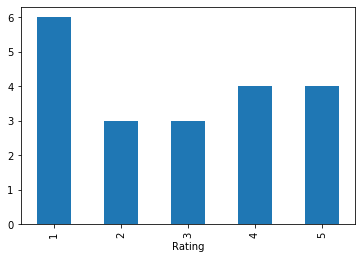

In [41]:
books_df.groupby("Rating").count()["Title"].plot(kind="bar")

### Going through all the pages of the catalogue

In [83]:
url_pattern = "http://books.toscrape.com/catalogue/page-{x}.html"
MAX_PAGE = 50

all_books_dict = {
    'Title': [],
    'Price': [],
    'Rating': []
}

for page in range(1, MAX_PAGE + 1):
    url = f"http://books.toscrape.com/catalogue/page-{page}.html"
    request = requests.get(url)
    new_data = request.content
    soup = BeautifulSoup(new_data, "html.parser")    
    books = soup.find_all("article", class_="product_pod")

    for book in books:
        all_books_dict['Title'].append(book.find("h3").string)
        all_books_dict['Price'].append(float(book.find("p", class_="price_color").string.strip("£")))
        all_books_dict['Rating'].append(parse_rating(book.find("p", class_="star-rating").attrs['class']))
        

In [84]:
len(all_books_dict["Title"])

1000

In [85]:
all_books_df = pd.DataFrame.from_dict(all_books_dict)
all_books_df.tail()

,Title,Price,Rating
995,Alice in Wonderland (Alice's ...,55.53,1
996,"Ajin: Demi-Human, Volume 1 ...",57.06,4
997,A Spy's Devotion (The ...,16.97,5
998,1st to Die (Women's ...,53.98,1
999,"1,000 Places to See ...",26.08,5


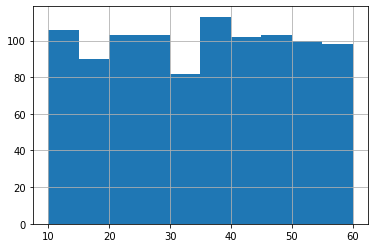

In [86]:
all_books_df["Price"].hist()

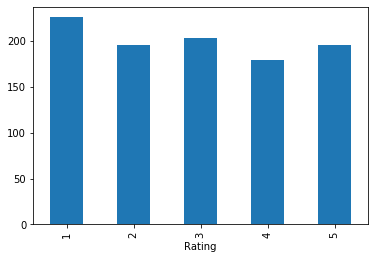

In [87]:
all_books_df.groupby("Rating").count()["Title"].plot(kind="bar")

In [104]:
all_books_df.to_csv("books.csv")